In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
%pwd

'/home/samoht25/uclax-data-science/01-iris-03-why-estimate-f'

In [3]:
%ls

04-why-estimate-f-prediction.ipynb  data/
05-the-train-test-split.ipynb       Review for notebook 4,5,6 python.ipynb
06-multicollinearity.ipynb          Review for notebook 7 - R.ipynb
07-why-estimate-f-inference.ipynb   Untitled.ipynb


In [4]:
iris_df = pd.read_csv("data/iris.csv", index_col=0)

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width
97,6.2,2.9,4.3,1.3
33,5.5,4.2,1.4,0.2
45,4.8,3.0,1.4,0.3
119,6.0,2.2,5.0,1.5


<Figure size 1440x720 with 0 Axes>

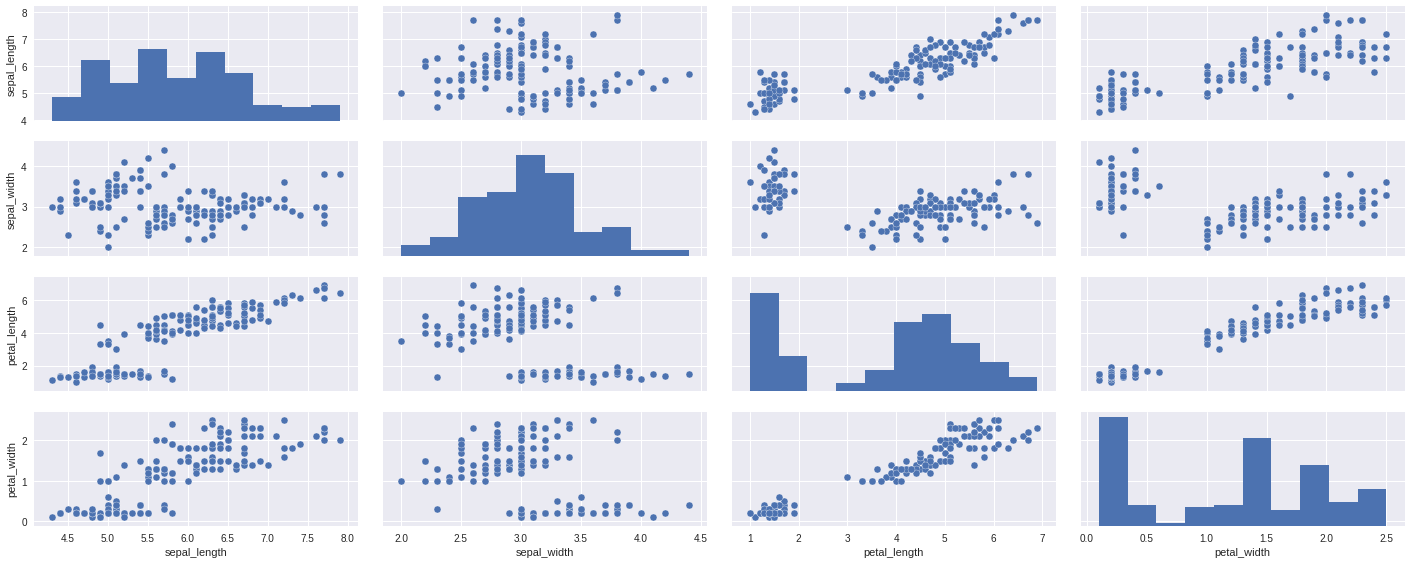

In [8]:
plt.figure(1, (20,10))
sns.pairplot(iris_df, size=2, aspect = 2.5)

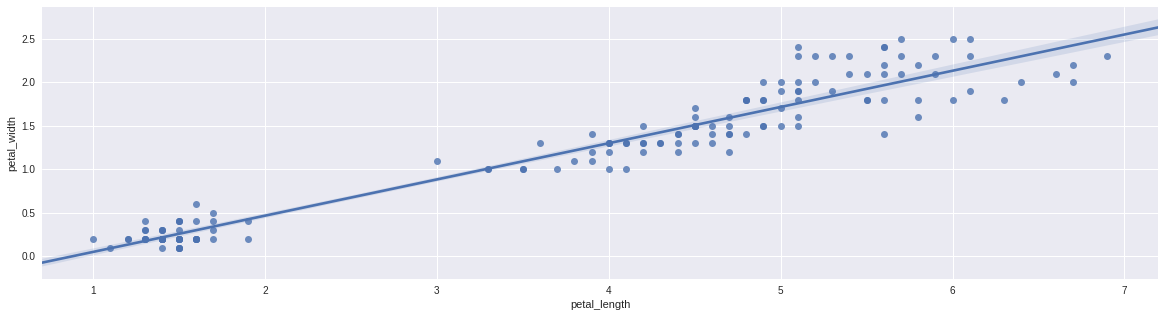

In [9]:
plt.figure(1, figsize = (20,5))
sns.regplot("petal_length", "petal_width", data=iris_df)

In [10]:
from patsy import dmatrices

In [11]:
target, features = dmatrices("petal_width ~ petal_length", iris_df)

In [12]:
features[:5,]

array([[ 1. ,  1.4],
       [ 1. ,  1.4],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  1.4]])

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear_regression_model = LinearRegression(fit_intercept=False)
linear_regression_model.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [15]:
predictions = linear_regression_model.predict(features)

In [17]:
predictions.shape

(150, 1)

In [ ]:
linear_regression_model.coef_#extra to know

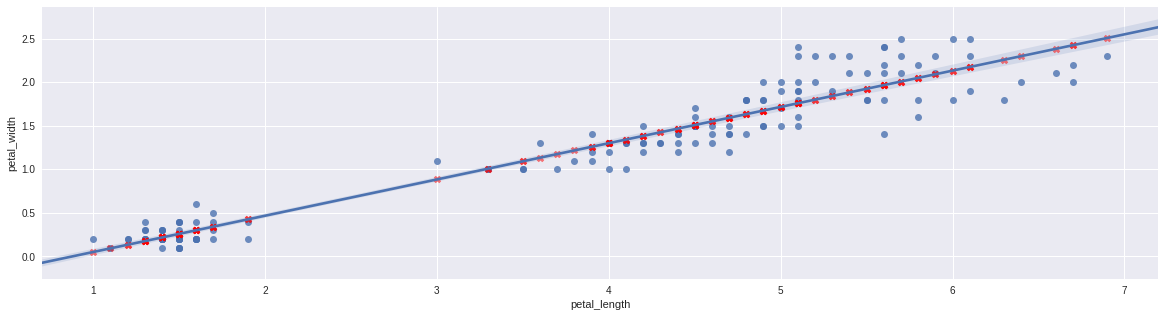

In [19]:
plt.figure(1,(20,5))
sns.regplot("petal_length", "petal_width", iris_df)

plt.scatter(iris_df.petal_length, predictions, marker="X", color="red", alpha=0.5)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
target, features = dmatrices("petal_width ~ petal_length", iris_df)

In [24]:
(features_train, features_test, target_train, target_test) = train_test_split(features, target, random_state=42)

In [25]:
linear_regression_model = LinearRegression(fit_intercept=False)

In [26]:
linear_regression_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [27]:
petal_width_prediction_var_1 = linear_regression_model.predict(features_test)

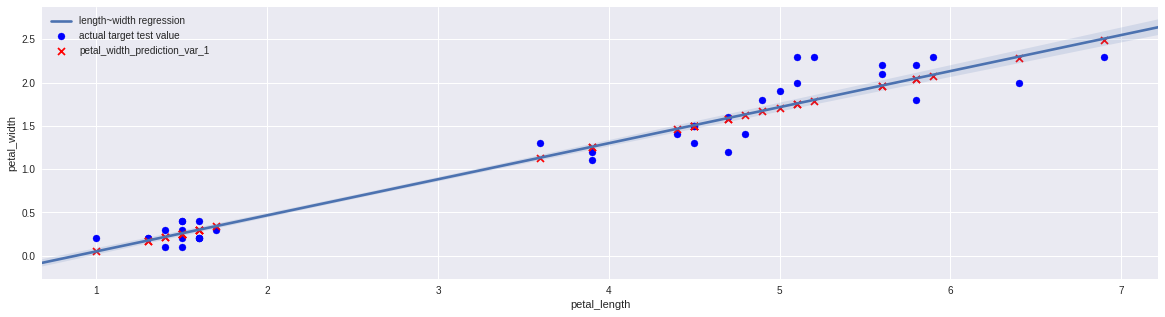

In [62]:
plt.figure(1, figsize=(20,5))

plt.scatter(features_test[:,1], target_test, marker="o", color="blue", label = "actual target test value")
plt.scatter(features_test[:,1], petal_width_prediction_var_1, marker="x", color="red", label = "petal_width_prediction_var_1")

sns.regplot("petal_length", "petal_width", scatter=False, label="length~width regression", data=iris_df) # put this on the bottom as it is used to turn off scatter.
plt.legend()

In [44]:
from patsy import dmatrices
target, features = dmatrices("petal_width ~ petal_length + sepal_length", iris_df)

In [46]:
from sklearn.model_selection import train_test_split
(features_train, features_test, target_train, target_test) = train_test_split(features, target, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=False)#turn off intercept or B0

In [50]:
linear_regression_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [51]:
petal_width_prediction_var_2 = linear_regression_model.predict(features_test)

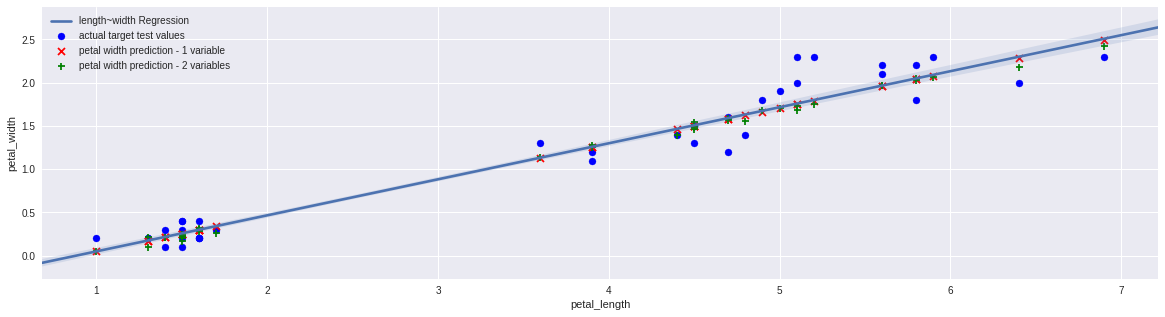

In [61]:
plt.figure(1, figsize=(20,5))

plt.scatter(features_test[:,1], target_test, marker = "o", color="blue", label="actual target test values")
plt.scatter(features_test[:,1], petal_width_prediction_var_1, marker="x", color="red", label = "petal width prediction - 1 variable")
plt.scatter(features_test[:,1], petal_width_prediction_var_2, marker="+", color="green", label = "petal width prediction - 2 variables")

sns.regplot("petal_length", "petal_width", data=iris_df, scatter=False, label = "length~width Regression")
plt.legend()

In [63]:
from patsy import dmatrices
target, features = dmatrices("petal_width ~ petal_length + sepal_length + sepal_width", iris_df)

In [67]:
from sklearn.model_selection import train_test_split
(features_train, features_test, target_train, target_test) = train_test_split(features, target, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=False)
linear_regression_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [69]:
petal_width_prediction_var_3 = linear_regression_model.predict(features_test)

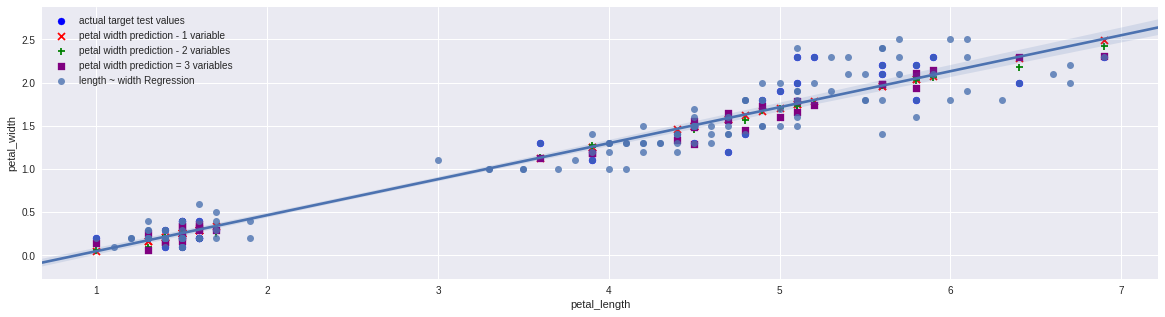

In [70]:
plt.figure(1, figsize=(20,5))

plt.scatter(features_test[:,1], target_test, marker = "o", color="blue", label="actual target test values")
plt.scatter(features_test[:,1], petal_width_prediction_var_1, marker="x", color="red", label = "petal width prediction - 1 variable")
plt.scatter(features_test[:,1], petal_width_prediction_var_2, marker="+", color="green", label = "petal width prediction - 2 variables")
plt.scatter(features_test[:,1], petal_width_prediction_var_3, marker = "s", color="purple", label = "petal width prediction = 3 variables")

sns.regplot("petal_length", "petal_width", data=iris_df, scatter="False", label="length ~ width Regression")
plt.legend()

In [73]:
#residual plots
x_values = features_test[:,1]
y_values = target_test
y_hat_1_values = petal_width_prediction_var_1
y_hat_2_values = petal_width_prediction_var_2
y_hat_3_values = petal_width_prediction_var_3

y_hat = (y_hat_1_values, y_hat_2_values, y_hat_3_values)
points = list(zip(x_values, y_values, y_hat_1_values, y_hat_2_values, y_hat_3_values))

In [88]:
x_values

array([ 4.7,  1.7,  6.9,  4.5,  4.8,  1.5,  3.6,  5.1,  4.5,  3.9,  5.1,
        1.4,  1.3,  1.5,  1.5,  4.7,  5.8,  3.9,  4.5,  5.6,  1.6,  4.9,
        1.6,  5.6,  6.4,  5.2,  5.8,  5.9,  1.4,  1.6,  1. ,  1.5,  4.4,
        1.6,  1.3,  5. ,  4.5,  1.5])

In [92]:
points[0:2]

[(4.7000000000000002,
  array([ 1.2]),
  array([ 1.58336589]),
  array([ 1.59363372]),
  array([ 1.56856217])),
 (1.7,
  array([ 0.3]),
  array([ 0.33901214]),
  array([ 0.25874381]),
  array([ 0.3002524]))]

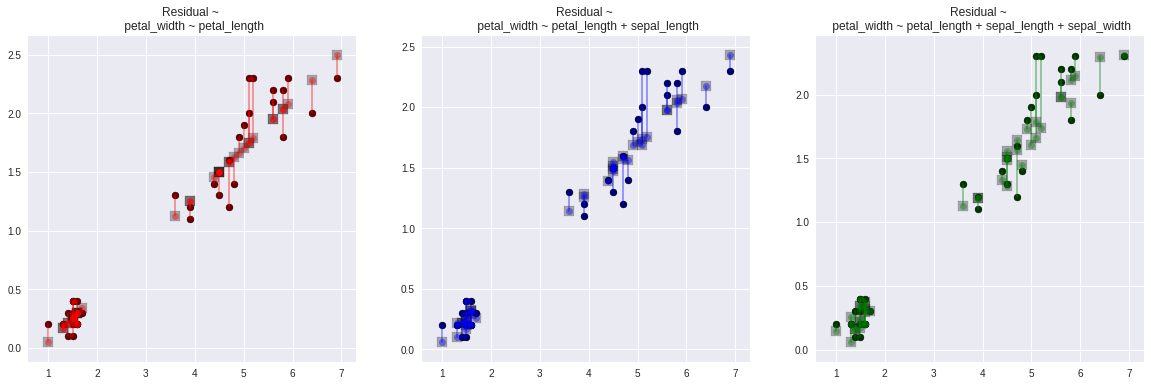

In [107]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

for point in points:
    x, y, y_hat_1, y_hat_2, y_hat_3 = point
    ax[0].plot([x,x], [y,y_hat_1], marker="o", color = "red", alpha=0.4)
    ax[0].set_title("Residual ~ \n petal_width ~ petal_length")
    ax[1].plot([x,x], [y,y_hat_2], marker="o", color = "blue", alpha=0.4)
    ax[1].set_title("Residual ~ \n petal_width ~ petal_length + sepal_length")
    ax[2].plot([x,x], [y,y_hat_3], marker="o", color = "green", alpha=0.4)
    ax[2].set_title("Residual ~ \n petal_width ~ petal_length + sepal_length + sepal_width")

#now i want to add original features test and yhats into the graph. Don't really think this is necessary. 
for i, x in enumerate(ax):
    x.scatter(features_test[:,1], target_test, marker="o", color="black")
    x.scatter(features_test[:,1], y_hat[i], marker="s", s=100, alpha = 0.3, color="black")